In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.datasets import make_classification

In [10]:
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

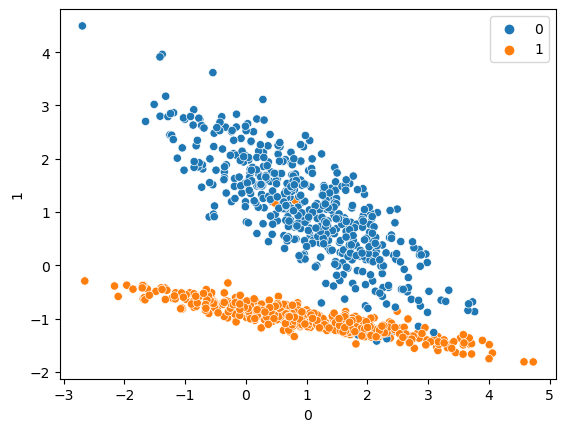

In [11]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

#### we can use both logistic and SVM also

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

## SVM

In [12]:
from sklearn.svm import SVC

In [15]:
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [16]:
y_pred = svc.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.98
[[147   5]
 [  1 147]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       152
           1       0.97      0.99      0.98       148

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



### Change the dataset which contains overlappind (n_clusters_per_class=2)

In [23]:
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

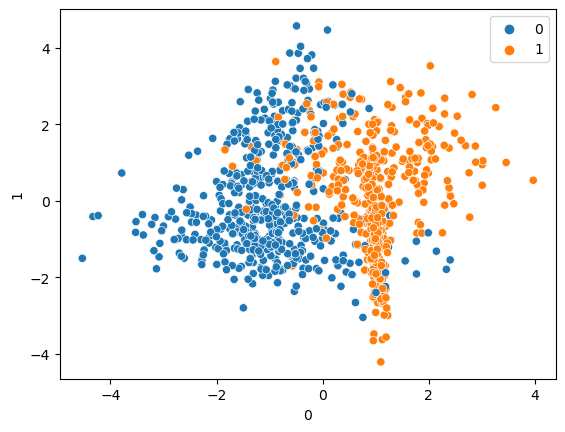

In [24]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [26]:
# karnel as linear
linear = SVC(kernel='linear')
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       165
           1       0.88      0.86      0.87       135

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

[[149  16]
 [ 19 116]]


In [27]:
# karnel as poly
poly = SVC(kernel='poly')
poly.fit(x_train,y_train)
y_pred = poly.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       165
           1       0.82      0.93      0.87       135

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

[[138  27]
 [ 10 125]]


In [28]:
# karnel as rbf
rbf = SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_pred = rbf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       165
           1       0.89      0.87      0.88       135

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[150  15]
 [ 17 118]]


In [29]:
# karnel as sigmoid
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(x_train,y_train)
y_pred = sigmoid.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       165
           1       0.74      0.74      0.74       135

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

[[129  36]
 [ 35 100]]


#### rbf is the best

# Hyperparameter tuning

In [35]:
# defining the parameter range
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001],
             'kernel':['rbf']}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5,refit=True,verbose=3)

In [38]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.914 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [39]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [40]:
y_pred4 = grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       165
           1       0.89      0.87      0.88       135

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[150  15]
 [ 17 118]]
